# House Prices Project

### Data Analysis

On importe nos **librairies**:

In [2]:
from bigml.api import BigML
import numpy as np
from pandas import DataFrame, read_csv, get_dummies, DataFrame
import kaggle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import kaggle

On charge nos **datasets** de **train/test** et on utilise la fonction **append()** pour effectuer nos futures modifications sur les features aux **deux datasets en même temps**:

In [3]:
train = read_csv('./train.csv')
test = read_csv('./test.csv')

data = train.append(test, sort=False)

Si on le souhaite on peut obtenir, avec **list()**, le nom de toutes les colonnes et ainsi pouvoir les **découper** pour donner de la **lisibilité aux histogrammes**:

```python
list(train)

A=train.loc[:,:'YearBuilt']
B=train.loc[:,'YearRemodAdd':'TotalBsmtSF']
C=train.loc[:,'Heating':'FireplaceQu']
D=train.loc[:,'GarageType':'WoodDeckSF']
E=train.loc[:, 'OpenPorchSF':]

E.hist(figsize=(25,20)) # figsize=() nous permet de configurer la taille de notre histogramme

plt.show()

```

On peut aussi avoir accès aux **types des différentes features**:

```python
data.select_dtypes(include = ['object']).columns
data.select_dtypes(include = ['int64', 'float64']).columns
```

On peut jeter un coup d'oeil aux **tendances générales**, à la **dispersion**, etc, avec la **fonction sommaire describe()**:

In [36]:
description = train.describe(include='all')
description

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


On visualise notre dataset contenant désormais les **1460 lignes de train** suivies des **1459 lignes de test**:

In [37]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


On remarque qu'il y beaucoup de valeurs "NaN" dans certaines features, celles-ci nous posent problèmes, nous allons donc procéder de la manière suivante:

- **Supprimer les colonnes** présentant plus de valeurs NaN que de valeurs exploitables (corrélation au préalable).
- **Remplacer les valeurs** manquantes par la moyenne des valeurs de la feature en utilisant les fonctions fillna et mean.

Visualisons celle avec **plus de 1000 valeurs manquantes NaN** dans un premier temps:

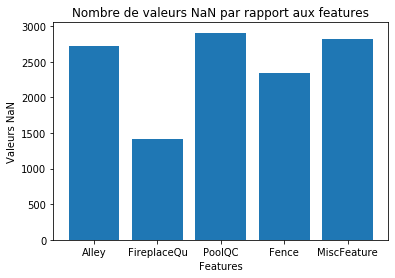

<Figure size 2160x1440 with 0 Axes>

In [38]:
# Plot features avec plus de 800 valeurs NaN

features = []
nullValues = []

for i in data:
    if (data.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(data.isna().sum()[i])
        
y_pos = np.arange(len(features)) 
plt.bar(y_pos, nullValues, alpha=1)
plt.xticks(y_pos, features)
plt.ylabel('Valeurs NaN')
plt.xlabel('Features')
plt.title('Nombre de valeurs NaN par rapport aux features')
fig = plt.figure(figsize=[30,20])
plt.show()

Les features **'Alley', 'FireplaceQu', 'PoolQC', 'Fence'** et **'MiscFeature'** sont celles qui présentent un nombre de valeurs NaN **au delà de notre seuil de 1000**.

### Data Cleaning

In [39]:
data = data.dropna(axis=1, how='any', thresh = 1000) # On supprime les colonnes qui contiennent plus de 1000 valeurs NaN
data = data.fillna(data.mean()) # On remplace les valeurs NaN par la moyenne des valeurs de la colonne 

# On fera attention au fait que les NaN de 'SalePrice' du test ont été remplacé par la moyenne 

data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.00000
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.00000
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.00000
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.00000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,180921.19589
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,180921.19589
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,180921.19589
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,180921.19589


Si on veut procéder à une **régression linéaire**, on va devoir **changer**, dans certaines features, nos valeurs **string en numérique**.

Pour cela, la **librairie pandas** nous donne accès à la méthode **get_dummies** qui change les valeurs **string en int**.
```python
pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
```

In [44]:
data = get_dummies(data) 

In [45]:
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


Afin de faire le **tri dans nos colonnes**, on va procéder à une **corrélation**:
- des features entre elles
- des features avec notre Output 'SalePrices'

Une **corrélation forte** signifirait **pour deux colonnes**, qu'elles nous apportent la **même qualité d'informations** et donc **une seule des deux pourraient être gardée**. Une **corrélation faible avec notre Output** signifirait pour la feature, qu'elle **ne contribue pas, ou très peu, au résultat final**.

Ainsi on va se donner comme **seuil 0.8 et 0.045**, pour la corrélation des features entre elles et pour les features avec SalePrice respectivement.

In [54]:
# Correlation entre features

correlationMatrix = data.corr()

featureList = [i for i in correlationMatrix] # On liste toutes nos features
droppedFeatures = set() # set où on va mettre nos features dropped

for i in range(len(featureList)) :
    for j in range(i+1,len(featureList)):  # Pour éviter les redondances
        feature1=featureList[i]
        feature2=featureList[j]
        
        if abs(correlationMatrix[feature1][feature2]) > 0.8: # Si la corrélation est supérieur 0.8 (tester diff. treshold)
            droppedFeatures.add(feature1) # On ajoute une des deux features à set()

data = data.drop(droppedFeatures, axis=1)

In [56]:
# Corrélation entre feature et output

nonCorrelatedMatrix = [column for column in data if abs(data[column].corr(data["SalePrice"])) < 0.045]

# Tester diff. treshold

data = data.drop(nonCorrelatedMatrix, axis=1)

On s'intéresse désormais aux **outliers**, visualisons une des **features par rapport à 'SalePrice'**:

Text(0.5, 1.0, 'SalePrice en fonction de LotArea')

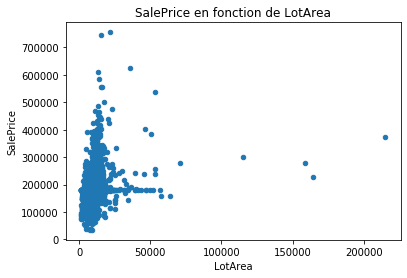

In [76]:
# plt.plot(data['LotArea'], data['SalePrice'], 'bo')
# plt.axvline(x=75000, color='r')
# plt.ylabel('SalePrice')
# plt.xlabel('LotArea')
# plt.title('SalePrice in function of LotArea')
# plt.show()

data.plot.scatter(x='LotArea', y='SalePrice')
plt.title('SalePrice en fonction de LotArea')

Avant, on doit **séparer** notre **data** en dataset de **train** et de **test** afin de **ne pas supprimer de lignes sur notre test set**.

In [63]:
trainModif = data.iloc[:1460]
testModif = data.iloc[1460:]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,...,GarageQual_TA,GarageCond_Fa,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,856,...,1,0,1,0,1,0,1,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,1262,...,1,0,1,0,1,0,1,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,920,...,1,0,1,0,1,0,1,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,961,...,1,0,1,0,1,0,1,1,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,1145,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0.0,953.0,953,...,1,0,1,0,1,0,1,0,1,0
1456,85.0,13175,6,6,1978,1988,119.0,790.0,589.0,2073,...,1,0,1,0,1,0,1,0,1,0
1457,66.0,9042,7,9,1941,2006,0.0,275.0,877.0,1188,...,1,0,1,0,1,0,1,0,1,0
1458,68.0,9717,5,6,1950,1996,0.0,49.0,0.0,1078,...,1,0,1,0,1,0,1,0,1,0


In [78]:
# Fonction qui retourne les outliers en utilisant la méthode percentile() de numpy

def outliers(x):
    quartile_1, quartile_3 = np.percentile(x, [25, 75]) # On garde nos données entre le 1er et 3e quartile
    y = quartile_3 - quartile_1
    limite_inf = quartile_1 - (y * 1.5) # Limite inférieur
    limite_sup = quartile_3 + (y * 1.5) # Limite supérieur
    return np.where((x > limite_sup) | (x < limite_inf)) # On retourne les outliers

In [82]:
# On enlève les outliers du train set

trainWithoutOutliers = newTrain

for column in newTrain:
    outlierList = np.ndarray.tolist(outliers(newTrain[column])[0]) # outliers_y() retourne un array
    trainWithoutOutliers = newTrain.drop(outlierList) # On enlève les lignes des outliers
    
trainWithoutOutliers = newTrain

### Data Training

Statistiquement, pour une démarche prédictive de Machine learning, on effectue des **transformations** comme log, sqrt, etc...,
On fait une **prédiction** du **log** puis pour revenir à nos unités brutes, on **passe à l'exponentielle**.

In [86]:
# On applique une régression linéaire sur notre train

X = trainWithoutOutliers.drop("SalePrice", axis=1) # On enlève la colonne
Y = np.log1p(trainWithoutOutliers["SalePrice"]) # Pour obtenir la colonne SalePrice{log1p(x) = log(x+1)} / Pos skewness
reg = LinearRegression().fit(X, Y)

In [96]:
# Prédiction

pred = np.expm1(reg.predict(newTest))

# Soumission de la prédiction

sub = DataFrame() # On crée un DataFrame pour la soumission à Kaggle
sub['Id'] = test['Id']
sub['SalePrice'] = pred
sub.to_csv("submission.csv", index=False) # Conversion en CSV

sub # Visualisation de notre sub

,Id,SalePrice
0,1461,123897.803894
1,1462,152728.451200
2,1463,173445.692251
3,1464,196479.978387
4,1465,209124.810780
...,...,...
1454,2915,79850.086312
1455,2916,84285.816973
1456,2917,163147.211837
1457,2918,122905.037223


### Soumission Kaggle

In [2]:
# Soumission à Kaggle et on récupère notre score (ainsi que les précédents)

submission_file = 'submission.csv'
kaggle.api.competition_submit(submission_file, "Linear Regression", "house-prices-advanced-regression-techniques")

# kaggle.api.competitions_submissions_list("house-prices-advanced-regression-techniques")

100%|██████████| 33.7k/33.7k [00:05<00:00, 6.77kB/s]


[{'ref': 13412803,
  'totalBytes': 34507,
  'date': '2019-11-21T10:21:34.26Z',
  'description': 'Linear Regression',
  'errorDescription': None,
  'fileName': 'submission.csv',
  'publicScore': None,
  'privateScore': None,
  'status': 'pending',
  'submittedBy': 'Corantin O',
  'submittedByRef': 'corantino',
  'teamName': 'Corantin O',
  'type': 'standard',
  'url': 'https://www.kaggle.com/submissions/13412803/13412803.raw'},
 {'ref': 13405938,
  'totalBytes': 34507,
  'date': '2019-11-20T23:38:26.167Z',
  'description': None,
  'errorDescription': None,
  'fileName': 'submission.csv',
  'publicScore': '0.13308',
  'privateScore': None,
  'status': 'complete',
  'submittedBy': 'Corantin O',
  'submittedByRef': 'corantino',
  'teamName': 'Corantin O',
  'type': 'standard',
  'url': 'https://www.kaggle.com/submissions/13405938/13405938.raw'},
 {'ref': 12619100,
  'totalBytes': 24473,
  'date': '2019-09-27T08:59:23.797Z',
  'description': None,
  'errorDescription': None,
  'fileName': '